Filas descargadas: 23

Análisis de GGAL (~30 días):
Precio inicial: $51.00
Precio actual:  $39.74
Variación:      -22.08%
Máximo:         $53.13
Mínimo:         $39.74


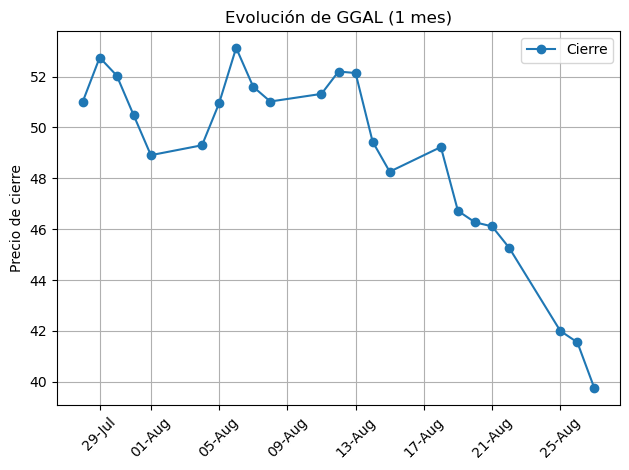

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta

# Parametrós de entrada

ticker = "GGAL"  
data = yf.download(ticker, period="1mo", interval="1d", progress=False, auto_adjust=False)

print(f"Filas descargadas: {len(data)}")
if data.empty:
    print("No se encontraron datos.")
else:
    close = data["Close"].dropna()

# Cálculos

precio_actual = close.iloc[-1].item()
precio_inicio = close.iloc[0].item()

variacion = (precio_actual / precio_inicio - 1) * 100

precio_max = close.max().item() if hasattr(close.max(), "item") else float(close.max())
precio_min = close.min().item() if hasattr(close.min(), "item") else float(close.min())

# Resultados

print(f"\nAnálisis de {ticker} (~{dias} días):")
print(f"Precio inicial: ${precio_inicio:,.2f}")
print(f"Precio actual:  ${precio_actual:,.2f}")
print(f"Variación:      {variacion:,.2f}%")
print(f"Máximo:         ${precio_max:,.2f}")
print(f"Mínimo:         ${precio_min:,.2f}")

# Gráfico

plt.figure()
plt.plot(close.index, close.values, marker="o", linestyle="-", label="Cierre")
plt.title(f"Evolución de {ticker} (1 mes)")
plt.ylabel("Precio de cierre")
    
# Formateo el eje X para fechas más legibles
    
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()